In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, uniform

In [163]:
N = 10000
met_step = 2
met_accept = 0
S = np.zeros(N)
L = np.zeros(N)
ms = np.zeros(N)
mv = np.zeros(N)
lik = np.zeros(N)
mu = np.zeros(N)

data = np.random.randn(47)

S[0] = 30
L[0] = 70
mu[0] = 0.8
lik[0] = 0.9
mv[0] = 1

for i in range(N-1):
    
    if np.random.rand() > 0.5:
        S_c = S[i] + uniform(0,met_step).rvs()
        L_c = S[i] + uniform(0,met_step).rvs()
        mv_c = mv[i] + uniform(0,met_step).rvs()
    else:
        S_c = S[i] - uniform(0,met_step).rvs()
        L_c = L[i] - uniform(0,met_step).rvs()
        mv_c = mv[i] + uniform(0,met_step).rvs()
       
    mu_c = norm(mu[i],0.063).rvs()    
    ms_i = norm(0.7, 0.05).pdf(mu[i])
    ms_c = norm(0.7, 0.05).pdf(mu_c)
    lik_i = norm(mu[i],1).pdf(data).prod()
    lik_c = norm(mu_c,1).pdf(data).prod()
    
    met_r = lik_c*S_c*L_c*ms_c*mv_c/lik_i*S[i]*L[i]*ms_i*mv[i]
   
    if np.random.rand() < min(1,met_r):
        
        S[i+1] = S_c
        L[i+1] = L_c
        mu[i+1] = mu_c
        mv[i+1] = mv_c
        ms[i] = ms_c
        lik[i] = lik_c
        met_accept = met_accept +1
    else:
        S[i+1] = S[i]
        L[i+1] = L[i]
        mu[i+1] = mu[i]
        mv[i+1] = mv[i]
        ms[i] = ms_i
        lik[i] = lik_i
        
        
M = met_accept/N
print(M)
print(S)

0.4566
[30.         30.16687472 32.02723316 ... 38.74821164 38.74821164
 38.74821164]


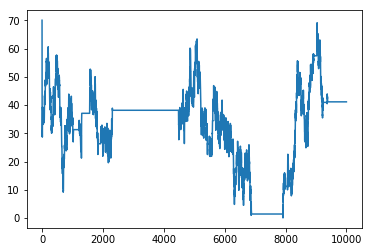

In [168]:
plt.plot(L)

(array([[1.048e+03, 3.000e+00, 1.000e+00, 6.000e+00, 2.000e+00, 6.000e+00,
         5.000e+00, 1.000e+00, 1.000e+00, 4.000e+00],
        [2.700e+02, 1.400e+01, 1.200e+01, 8.000e+00, 7.000e+00, 1.000e+00,
         1.000e+01, 4.000e+00, 1.200e+01, 2.000e+01],
        [3.410e+02, 2.700e+01, 1.800e+01, 1.100e+01, 1.300e+01, 9.000e+00,
         1.100e+01, 2.200e+01, 1.800e+01, 4.700e+01],
        [6.410e+02, 3.700e+01, 3.200e+01, 1.400e+01, 1.900e+01, 1.300e+01,
         2.200e+01, 2.900e+01, 2.900e+01, 6.100e+01],
        [9.550e+02, 7.900e+01, 4.900e+01, 2.800e+01, 3.300e+01, 1.900e+01,
         2.500e+01, 4.400e+01, 4.100e+01, 7.100e+01],
        [3.988e+03, 4.600e+01, 3.700e+01, 3.100e+01, 3.700e+01, 2.600e+01,
         1.900e+01, 1.800e+01, 2.500e+01, 5.600e+01],
        [4.350e+02, 4.100e+01, 2.600e+01, 3.000e+01, 1.500e+01, 2.000e+01,
         2.000e+01, 2.800e+01, 1.900e+01, 6.500e+01],
        [3.160e+02, 3.500e+01, 1.600e+01, 1.900e+01, 8.000e+00, 1.400e+01,
         1.800e+01, 1.

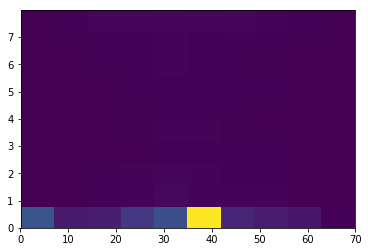

In [169]:
plt.hist2d(L,ms)